In [1]:
import pandas as pd 
import os

In [2]:
os.getcwd()

'C:\\Users\\SerBeld\\Desktop\\Tensorflow\\Class\\Regresión'

In [3]:
base = pd.read_csv('kc_house_data.csv')
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# id 1
# date 2
# price 3
# bedrooms 4
# bathrooms 5
# sqft_living 6
# sqft_lot 7
# floors 8
# waterfront 9
# view 10
# condition 11
# grade 12
# sqft_above 13
# sqft_basement 14 
# yr_built 15
# yr_renovated 16
# zipcode 17
# lat 18
# long 19
# sqft_living15 20
# sqft_lot15 21

# Don't use (id, date, sqft_living15,sqft_lot15).

x= base.iloc[:,3:19].values
y= base.iloc[:,2:3].values

In [5]:
#x 

In [6]:
#y

In [7]:
x.shape #Visualizar estrucutra de datos 

(21613, 16)

In [8]:
y.shape

(21613, 1)

In [9]:
from sklearn.preprocessing import StandardScaler, Normalizer
scalerX = StandardScaler()
x = scalerX.fit_transform(x)
scalerY = StandardScaler()
y = scalerY.fit_transform(y)

In [10]:
#x

In [11]:
#y

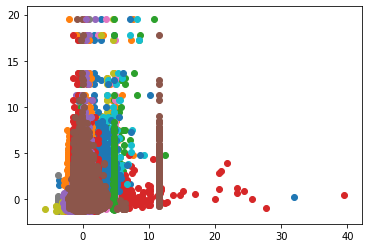

In [12]:
#Graficar
import matplotlib.pyplot as plt
%matplotlib inline

x = x.astype('float32')
y = y.astype('float32')

plt.scatter(x[:,0],y)
plt.scatter(x[:,1],y)
plt.scatter(x[:,2],y)
plt.scatter(x[:,3],y)
plt.scatter(x[:,4],y)
plt.scatter(x[:,5],y)
plt.scatter(x[:,6],y)
plt.scatter(x[:,7],y)
plt.scatter(x[:,8],y)
plt.scatter(x[:,9],y)
plt.scatter(x[:,10],y)
plt.scatter(x[:,11],y)
plt.scatter(x[:,12],y)
plt.scatter(x[:,13],y)
plt.scatter(x[:,14],y)
plt.scatter(x[:,15],y)

In [13]:
import numpy as np

In [14]:
import tensorflow as tf

In [15]:
columnas = [tf.feature_column.numeric_column('x',shape = [1])]

In [16]:
#regressor = tf.estimator.LinearRegressor(feature_columns = columnas)

In [17]:
from sklearn.model_selection import train_test_split
# Data de entrenamiento y testing
x_entrenamiento, x_test, y_entrenamiento, y_test = train_test_split(x,y,test_size = 0.3)

In [18]:
print(x_entrenamiento.shape,'X Datos de entrenamiento')
print(y_entrenamiento.shape,'Y Datos de entrenamiento')
print(x_test.shape,'X Datos de test')
print(y_test.shape,'Y Datos de test')

(15129, 16) X Datos de entrenamiento
(15129, 1) Y Datos de entrenamiento
(6484, 16) X Datos de test
(6484, 1) Y Datos de test


In [19]:
np.random.seed(0)

R = np.random.rand(16)
R = R.astype('float32')
random_b = tf.Variable(R)
bo = tf.Variable(R[0])


#print(np.size(random_b))

In [20]:
batch_size = 32 #Tomamos 32 filas de la basedata
xph = tf.placeholder('float32', [batch_size,16])
yph = tf.placeholder('float32', [batch_size,16])
print(xph)

Tensor("Placeholder:0", shape=(32, 16), dtype=float32)


In [21]:

y_modelo = bo + np.dot(xph,random_b)


In [22]:
error = tf.losses.mean_squared_error(yph, y_modelo)

W1125 09:39:35.398362  9336 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\losses\losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
optimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
entrenamiento = optimizador.minimize(error)
init = tf.global_variables_initializer ()

In [50]:
with tf.Session() as sess:
    sess.run(init)
    for i in range (100):
        indices = np.random.randint(len(x_entrenamiento), size = batch_size)
        ########################################################
        rock = (y_entrenamiento[indices],y_entrenamiento[indices],y_entrenamiento[indices],
                y_entrenamiento[indices],y_entrenamiento[indices],y_entrenamiento[indices],
                y_entrenamiento[indices],y_entrenamiento[indices],y_entrenamiento[indices],
                y_entrenamiento[indices],y_entrenamiento[indices],y_entrenamiento[indices],
                y_entrenamiento[indices],y_entrenamiento[indices],y_entrenamiento[indices],
                y_entrenamiento[indices])
        
        rockandroll = np.array(rock)
        #print(rockandroll.shape)
        r = rockandroll[:,:,0]
        rinv = np.matrix.transpose(r)
        #print(rinv.shape)
        ########################################################
        feed = {xph:x_entrenamiento[indices],yph:rinv}
        sess.run(entrenamiento, feed_dict = feed)
    bo_final , b1_final = sess.run([bo,random_b])

In [51]:
bo_final

0.4427394

In [52]:
b1_final

array([0.54448855, 0.71224   , 0.6032853 , 0.5402159 , 0.4213531 ,
       0.64076334, 0.4359889 , 0.8814257 , 0.9592834 , 0.38532308,
       0.78614604, 0.52283835, 0.56298804, 0.91397476, 0.07399514,
       0.08631372], dtype=float32)

In [53]:
prevision_test = bo_final * b1_final*x_test

In [54]:
prevision_test

array([[ 0.1630779 ,  0.2601007 ,  0.17743161, ..., -0.4155133 ,
        -0.05964134, -0.04588818],
       [-0.09612218, -0.14935021, -0.22099684, ..., -0.19618443,
         0.03292298,  0.02276624],
       [-0.09612218,  0.15773797, -0.14538267, ..., -0.30206734,
        -0.04874168,  0.05125919],
       ...,
       [-0.35532227, -0.45643836, -0.27043685, ...,  0.9155861 ,
         0.02304   , -0.04887315],
       [ 0.1630779 , -0.14935021,  0.09309274, ...,  0.41642386,
         0.03604393, -0.03204875],
       [ 0.1630779 ,  0.46482614,  0.18615632, ...,  0.30297786,
        -0.00110002, -0.01441026]], dtype=float32)

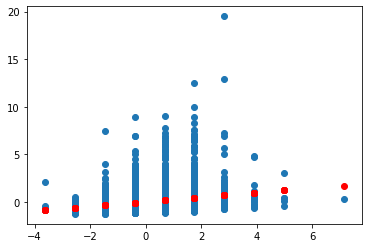

In [55]:
plt.scatter(x_test[:,0],y_test)
plt.scatter(x_test[:,0],prevision_test[:,0],color = 'red')

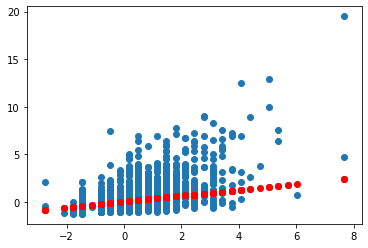

In [56]:
plt.scatter(x_test[:,1],y_test)
plt.scatter(x_test[:,1],prevision_test[:,1],color = 'red')

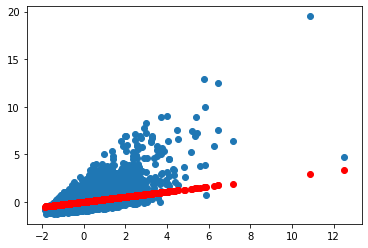

In [57]:
plt.scatter(x_test[:,2],y_test)
plt.scatter(x_test[:,2],prevision_test[:,2],color = 'red')

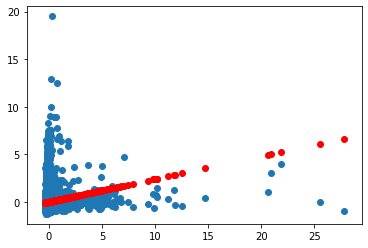

In [58]:
plt.scatter(x_test[:,3],y_test)
plt.scatter(x_test[:,3],prevision_test[:,3],color = 'red')

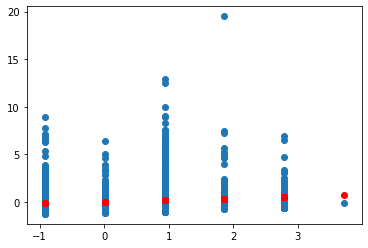

In [59]:
plt.scatter(x_test[:,4],y_test)
plt.scatter(x_test[:,4],prevision_test[:,4],color = 'red')

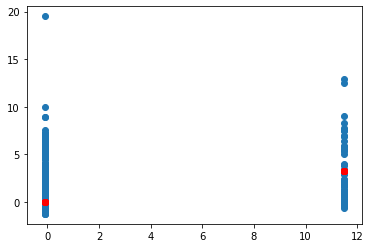

In [60]:
plt.scatter(x_test[:,5],y_test)
plt.scatter(x_test[:,5],prevision_test[:,5],color = 'red')

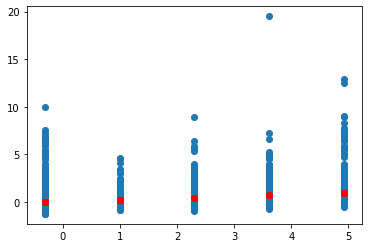

In [61]:
plt.scatter(x_test[:,6],y_test)
plt.scatter(x_test[:,6],prevision_test[:,6],color = 'red')

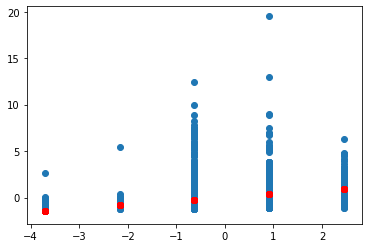

In [62]:
plt.scatter(x_test[:,7],y_test)
plt.scatter(x_test[:,7],prevision_test[:,7],color = 'red')

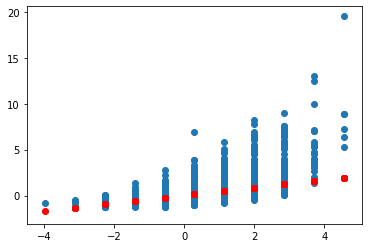

In [63]:
plt.scatter(x_test[:,8],y_test)
plt.scatter(x_test[:,8],prevision_test[:,8],color = 'red')

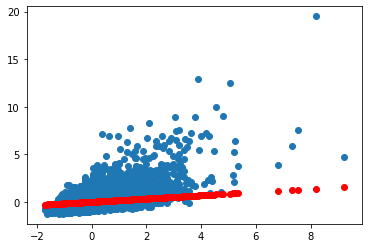

In [64]:
plt.scatter(x_test[:,9],y_test)
plt.scatter(x_test[:,9],prevision_test[:,9],color = 'red')

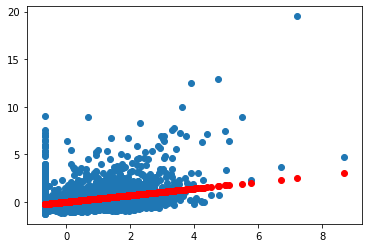

In [65]:
plt.scatter(x_test[:,10],y_test)
plt.scatter(x_test[:,10],prevision_test[:,10],color = 'red')

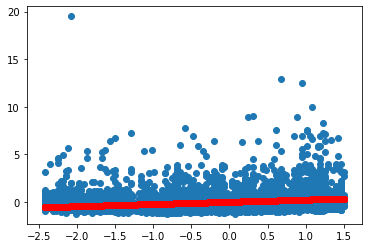

In [66]:
plt.scatter(x_test[:,11],y_test)
plt.scatter(x_test[:,11],prevision_test[:,11],color = 'red')

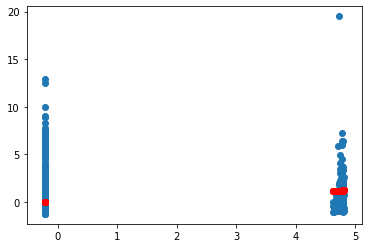

In [67]:
plt.scatter(x_test[:,12],y_test)
plt.scatter(x_test[:,12],prevision_test[:,12],color = 'red')

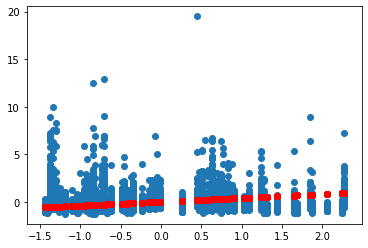

In [68]:
plt.scatter(x_test[:,13],y_test)
plt.scatter(x_test[:,13],prevision_test[:,13],color = 'red')

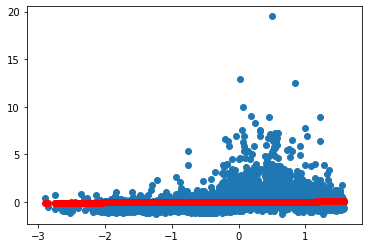

In [69]:
plt.scatter(x_test[:,14],y_test)
plt.scatter(x_test[:,14],prevision_test[:,14],color = 'red')

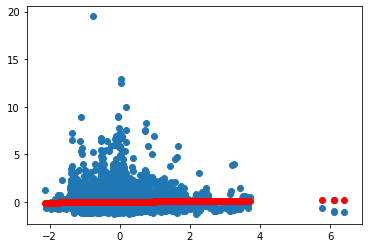

In [70]:
plt.scatter(x_test[:,15],y_test)
plt.scatter(x_test[:,15],prevision_test[:,15],color = 'red')

In [71]:
#Retomando a escala original de los datos
y_test_1 = scalerY.inverse_transform(y_test) 
previsiones_1 = scalerY.inverse_transform(prevision_test)

In [72]:
#previsiones_1

In [73]:
from sklearn.metrics import mean_absolute_error

In [74]:
mae = mean_absolute_error(y_test_1,previsiones_1[:,0])
mae_1 = mean_absolute_error(y_test_1,previsiones_1[:,1])
mae_2 = mean_absolute_error(y_test_1,previsiones_1[:,2])
mae_3 = mean_absolute_error(y_test_1,previsiones_1[:,3])
mae_4 = mean_absolute_error(y_test_1,previsiones_1[:,4])
mae_5 = mean_absolute_error(y_test_1,previsiones_1[:,5])
mae_6 = mean_absolute_error(y_test_1,previsiones_1[:,6])
mae_7 = mean_absolute_error(y_test_1,previsiones_1[:,7])
mae_8 = mean_absolute_error(y_test_1,previsiones_1[:,8])
mae_9 = mean_absolute_error(y_test_1,previsiones_1[:,9])
mae_10 = mean_absolute_error(y_test_1,previsiones_1[:,10])
mae_11 = mean_absolute_error(y_test_1,previsiones_1[:,11])
mae_12 = mean_absolute_error(y_test_1,previsiones_1[:,12])
mae_13 = mean_absolute_error(y_test_1,previsiones_1[:,13])
mae_14 = mean_absolute_error(y_test_1,previsiones_1[:,14])
mae_15 = mean_absolute_error(y_test_1,previsiones_1[:,15])

In [75]:
print("Error mae regresión 1" + str(mae))
print("Error mae regresión 2" + str(mae_1))
print("Error mae regresión 3" + str(mae_2))
print("Error mae regresión 4" + str(mae_3))
print("Error mae regresión 5" + str(mae_4))
print("Error mae regresión 6" + str(mae_5))
print("Error mae regresión 7" + str(mae_6))
print("Error mae regresión 8" + str(mae_7))
print("Error mae regresión 9" + str(mae_8))
print("Error mae regresión 10" + str(mae_9))
print("Error mae regresión 11" + str(mae_10))
print("Error mae regresión 12" + str(mae_11))
print("Error mae regresión 13" + str(mae_12))
print("Error mae regresión 14" + str(mae_13))
print("Error mae regresión 15" + str(mae_14))
print("Error mae regresión 16" + str(mae_15))

Error mae regresión 1223346.5
Error mae regresión 2204865.17
Error mae regresión 3192453.25
Error mae regresión 4235703.23
Error mae regresión 5226777.56
Error mae regresión 6231115.33
Error mae regresión 7223051.92
Error mae regresión 8256991.62
Error mae regresión 9175330.98
Error mae regresión 10210725.08
Error mae regresión 11227248.84
Error mae regresión 12244869.0
Error mae regresión 13235811.3
Error mae regresión 14266176.62
Error mae regresión 15232563.42
Error mae regresión 16235786.31


In [ ]:
#End